# Analysis of COVID-19 dataset

### **Iacopo Erpichini** e-mail: iacopo.erpichini@stud.unifi.it  
### ADVANCED ALGORITHMS AND GRAPH MINING

The following work is an alaysis based on data taken from "Dipartimento della protezione civile Italiana" ([github](https://github.com/pcm-dpc/COVID-19)) and is used for familiarize with Python 3.7 notebook and [Pandas](https://pandas.pydata.org/) that is a libray used for data analysis.

The data are collected based on the infection and the emercency in our country but in this analysis the focus is on two [JSON](https://www.json.org/json-en.html) datasets:
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json

In particular this two data represent the contagius status in the Italian Regions and Provinces.

All the data are explained in details here:
    - [Data Format](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md)
Is very importanto to read the Data Format for made complex statistics and understanding what is done.

## Index
1. [Loading data](#1)
2. [Regions analisys](#2)
3. [Province analisys](#3)
4. [Data preparation for heatmap](#4)
5. [Heatmap with data](#5)
6. [Extra](#6)

parlare delle librerie messe che uso poi per fare i data e come li scarico dopo indice

In [62]:
# install geopandas for made heatmap later
# !pip install git+git://github.com/geopandas/geopandas.git
# if u don't have numpy,pandas or matplotlib -> use -> !pip install <name>

In [63]:
# importing the library
import os
import io
import json
import math
import shutil
import zipfile
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Download the last data
First remove the old directory if exist then download the data

In [64]:
#  UNCOMMENT THIS CELL IF YOU HAVE ALREDY DOWNLOADED THE DATA
# dir_path = 'COVID-19'
# shutil.rmtree(dir_path)

In [65]:
# download the data
# !git clone https://github.com/pcm-dpc/COVID-19.git

In [66]:
ls #check the directory

COVID-19/        Erpichini.py  Limiti01012018/  test.py
Erpichini.ipynb  functions.py  __pycache__/     utils.py
Erpichini.pdf    img/          README.md


## Prepare the data for Pandas <a name="1"></a>

Here there is a preliminary data analysis for understanding how data are collected using simple Python dictionary

In [67]:
data_folder_path = "COVID-19/dati-json/"

with open(os.path.join(data_folder_path, "dpc-covid19-ita-regioni.json")) as file:
    regions = json.load(file)

with open(os.path.join(data_folder_path, "dpc-covid19-ita-province.json")) as file:
    provinces = json.load(file)

In [68]:
regions[0]

{'data': '2020-02-24T18:00:00',
 'stato': 'ITA',
 'codice_regione': 13,
 'denominazione_regione': 'Abruzzo',
 'lat': 42.35122196,
 'long': 13.39843823,
 'ricoverati_con_sintomi': 0,
 'terapia_intensiva': 0,
 'totale_ospedalizzati': 0,
 'isolamento_domiciliare': 0,
 'totale_positivi': 0,
 'variazione_totale_positivi': 0,
 'nuovi_positivi': 0,
 'dimessi_guariti': 0,
 'deceduti': 0,
 'casi_da_sospetto_diagnostico': None,
 'casi_da_screening': None,
 'totale_casi': 0,
 'tamponi': 5,
 'casi_testati': None,
 'note': None}

In [69]:
provinces[0]

{'data': '2020-02-24T18:00:00',
 'stato': 'ITA',
 'codice_regione': 13,
 'denominazione_regione': 'Abruzzo',
 'codice_provincia': 66,
 'denominazione_provincia': "L'Aquila",
 'sigla_provincia': 'AQ',
 'lat': 42.35122196,
 'long': 13.39843823,
 'totale_casi': 0,
 'note': None}

The two object are two dictionary, is possible to see how are made the structure of two single item of each JSON data.
The same file may can be opend like a csv file that maybe is much similar to a Pandas dataframe but the conversion from dictionary to dataframe is given by the Pandas.

### Pandas DataFrame

Pandas is an intuitive and good documentated library and the data loading as dataframe is simple, also this format have a lot of methods and function for analysis.

In [70]:
df_regions = pd.DataFrame(regions)
df_provinces = pd.DataFrame(provinces)

Now for replicate the same content of each dataframe like the dictionary we can use the function head(int) from Pandas that display the content of the frist element in the dataframe.

In [71]:
df_regions.head(1)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,None


In [72]:
df_provinces.head(1)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None


#### Describe()
A very interesting function for analyze the data are the describe function that gave a descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In our cases for example is intersting see the mean,min and max of "ricoverati_con_sintomi" or "terapia_intensiva" column but is not important the mean of "lat" or "codice_regione" because this mean have no sense with this type of data so is important analyze every aspect of the data.

In [73]:
df_regions.describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
count,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.00000,5796.000000,5796.000000,3234.000000,3234.000000,5796.000000,5.796000e+03,4.641000e+03
mean,11.857143,43.046293,12.225955,467.983782,51.166667,519.150449,4548.402174,5067.552622,136.555556,255.52726,8207.663043,1425.944444,15265.948980,5289.736858,14701.163043,3.235263e+05,2.420196e+05
std,6.274340,2.488995,2.659177,1233.170667,129.825374,1358.673889,13342.105665,14188.937970,649.756524,789.28799,16664.503264,3293.349062,29138.367898,12429.257344,30554.771545,4.980216e+05,3.040983e+05
min,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-14488.000000,-229.00000,0.000000,0.000000,400.000000,0.000000,0.000000,0.000000e+00,3.482000e+03
25%,7.000000,41.125596,11.121231,15.000000,1.000000,16.000000,129.000000,156.000000,-3.000000,3.00000,640.750000,97.000000,2005.000000,116.000000,1361.000000,3.546900e+04,6.291800e+04
50%,12.000000,43.616760,12.388247,85.000000,8.000000,95.500000,686.000000,836.500000,6.000000,27.00000,2725.500000,358.000000,4932.000000,1352.500000,4449.000000,1.437045e+05,1.292510e+05
75%,17.000000,45.434905,13.768136,341.250000,41.000000,379.500000,2656.250000,3232.250000,75.000000,137.00000,7716.250000,1026.250000,17375.500000,4876.750000,12739.000000,3.574862e+05,2.888370e+05
max,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,10263.000000,11489.00000,227924.000000,21005.000000,286833.000000,100125.000000,386958.000000,3.904809e+06,2.289221e+06


In [74]:
df_provinces.describe()

,codice_regione,codice_provincia,lat,long,totale_casi
count,38562.000000,38562.000000,29532.000000,29532.000000,38562.000000
mean,10.366267,264.675432,42.908522,12.096599,2209.532026
std,5.997680,382.417089,2.631554,2.660591,5567.260566
min,1.000000,1.000000,36.925092,7.320149,0.000000
25%,5.000000,35.000000,40.914047,9.828190,97.000000
50%,9.000000,70.000000,43.715532,12.104734,598.000000
75%,16.000000,109.000000,45.185093,14.167546,2222.000000
max,22.000000,999.000000,46.499335,18.171897,144616.000000


Pandas give the possibilities to analyze every aspect of a data and to use the right type for every data for made the right statistics, so is important to control and maybe remove not useful data for analysis.

For a preliminary analysis on data the columns "stato", "note", "lat", "long" are removed.

In [75]:
df_regions.drop(columns=["stato", "note", "lat", "long"],inplace=True)
df_provinces.drop(columns=["stato", "note"],inplace=True) # lat and long in provinces are used for heatmap
# type of fields in dataframe region
df_regions.dtypes
# df_regions.shape this gave the number of rowsxcolumn

data                             object
codice_regione                    int64
denominazione_regione            object
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
dtype: object

Also i see with the .dtypes method tath the data is an object and for use later some methods is necessary to normalize this field in the two table.

In [76]:
df_regions["data"] = pd.DatetimeIndex(df_regions["data"]).normalize()
df_provinces["data"] = pd.DatetimeIndex(df_provinces["data"]).normalize()

## Region analisys<a name="2"></a>

For this analisys the choiches of indexes is to use a multi-index with the "data" and "denominazione_regione", the table also can be sorted by the multi-index.
Same things can be done with the provinces later.

In [77]:
df_region_index = df_regions.set_index(["data", "denominazione_regione"]).sort_index()
df_region_index.head()

codice_regione  ricoverati_con_sintomi  \
data       denominazione_regione                                           
2020-02-24 Abruzzo                            13                       0   
           Basilicata                         17                       0   
           Calabria                           18                       0   
           Campania                           15                       0   
           Emilia-Romagna                      8                      10   

                                  terapia_intensiva  totale_ospedalizzati  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                                0                     0   
           Basilicata                             0                     0   
           Calabria                               0                     0   
           Campania                               0                     0   
           Emilia-Romagna                         2                    12   

                                  isolamento_domiciliare  totale_positivi  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                                     0                0   
           Basilicata                                  0                0   
           Calabria                                    0                0   
           Campania                                    0                0   
           Emilia-Romagna                              6               18   

                                  variazione_totale_positivi  nuovi_positivi  \
data       denominazione_regione                                               
2020-02-24 Abruzzo                                         0               0   
           Basilicata                                      0               0   
           Calabria                                        0               0   
           Campania                                        0               0   
           Emilia-Romagna                                  0              18   

                                  dimessi_guariti  deceduti  \
data       denominazione_regione                              
2020-02-24 Abruzzo                              0         0   
           Basilicata                           0         0   
           Calabria                             0         0   
           Campania                             0         0   
           Emilia-Romagna                       0         0   

                                  casi_da_sospetto_diagnostico  \
data       denominazione_regione                                 
2020-02-24 Abruzzo                                         NaN   
           Basilicata                                      NaN   
           Calabria                                        NaN   
           Campania                                        NaN   
           Emilia-Romagna                                  NaN   

                                  casi_da_screening  totale_casi  tamponi  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                              NaN            0        5   
           Basilicata                           NaN            0        0   
           Calabria                             NaN            0        1   
           Campania                             NaN            0       10   
           Emilia-Romagna                       NaN           18      148   

                                  casi_testati  
data       denominazione_regione                
2020-02-24 Abruzzo                         NaN  
           Basilicata                      NaN  
           Calabria                        NaN  
           Campania                        NaN  
           Emilia-Romagna                  NaN

So with this index ispossible to use the .loc on fataframe for resume the actual situation of covid in italy, pandas gave also the possibility of adding new column with data aggregated.


In [78]:
today = df_regions.loc[df_regions.data == df_regions.iloc[[-1]]["data"].item()]
today = today[["data", "denominazione_regione", "deceduti", "totale_ospedalizzati",
               "totale_casi","dimessi_guariti", "tamponi"]]
today["percentuale_guariti"] = today["dimessi_guariti"] / today["totale_casi"] * 100
display(today)

,data,denominazione_regione,deceduti,totale_ospedalizzati,totale_casi,dimessi_guariti,tamponi,percentuale_guariti
5775,2020-11-25,Abruzzo,831,748,25445,7582,389766,29.797603
5776,2020-11-25,Basilicata,133,176,7218,1218,144321,16.874480
5777,2020-11-25,Calabria,250,468,14859,4345,350996,29.241537
5778,2020-11-25,Campania,1434,2474,143010,39428,1484741,27.570100
5779,2020-11-25,Emilia-Romagna,5493,3012,112700,34681,2040254,30.772848
5780,2020-11-25,Friuli Venezia Giulia,715,642,26285,12034,679986,45.782766
5781,2020-11-25,Lazio,2146,3697,109592,20881,2092689,19.053398
5782,2020-11-25,Liguria,2308,1238,49381,33018,578449,66.863774
5783,2020-11-25,Lombardia,21005,9056,386958,227924,3904809,58.901483
5784,2020-11-25,Marche,1211,672,27554,10312,398356,37.424693


With pandas is possible to retrive statistics on column with the method of the class data frame so there is a little intuitive interactive code for made statistics for retrive the min or max region with field "deceduti" of the day or another field.

###  <font color='blue'>Interactive Cell</font> 


In [79]:
# choose the parameters, column_name is the name of the statistics 
KEY = "deceduti"# EG: "totale_ospedalizzati","totale_casi","dimessi_guariti", "tamponi"
OPERATION = "min" # "min","max" are the operation 
if OPERATION=="min":
    display(today.loc[today[KEY].idxmin()])
elif OPERATION=="max":
    display(today.loc[today[KEY].idxmax()])

data                     2020-11-25 00:00:00
denominazione_regione                 Molise
deceduti                                  99
totale_ospedalizzati                      76
totale_casi                             4177
dimessi_guariti                         1528
tamponi                                86418
percentuale_guariti                  36.5813
Name: 5785, dtype: object

### National statistichs of COVID now
With the sum function of pandas is possible to have the national statistics of COVID-19

In [80]:
today.drop(columns=["denominazione_regione", "percentuale_guariti"],inplace=True)

In [81]:
today.sum(axis = 0, skipna = True)

deceduti                   52028
totale_ospedalizzati       38161
totale_casi              1480874
dimessi_guariti           637149
tamponi                 20956187
dtype: int64

The emergency in Italy actually cuold be visualized with a pie chart that represent the percentage of how many victims the COVID-19 have made in relations of how many people are infected right now and are in hospital recovery and how may people have won this disease.

In [82]:
today.drop(columns=["data","tamponi","totale_casi"],inplace=True)

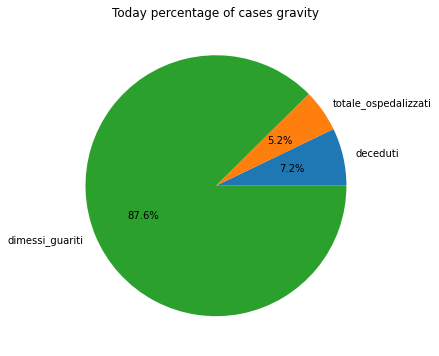

In [83]:
ax = today.sum(axis = 0, skipna = True).plot.pie(title="Today percentage of cases gravity",figsize=(12,6), autopct='%1.1f%%',
        shadow=False, legend = False)
ax.set_ylabel(None);

Now the next step is display a simple graph that explain the total cases variation during the evolution of COVID-19 in Italy. We know commenti su marzo e adesso cosa fare ecc perchè

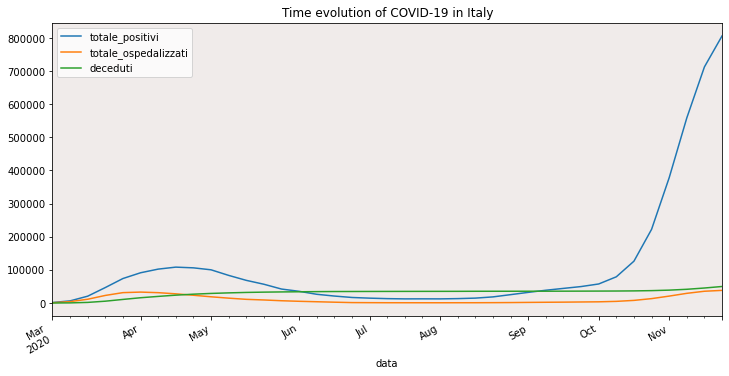

In [84]:
# data manipulation
# first chose the data to display and group by column "data" with week frequency
data_to_plot = df_regions[["data","totale_positivi","totale_ospedalizzati","deceduti"]]
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
ax = data_to_plot.plot(figsize=(12,6),title="Time evolution of COVID-19 in Italy")
ax.set_facecolor("#F0EBEA")
plt.gcf().autofmt_xdate()

Another interesting graph is about to look at the severity of the disease in time, in fact we can say that in summer the situation is better than in the first time or now for example about the deats per weeks.

fare discorso che splitta in due i grafici tra situa marzo e situa di adesso e dire che si puo modificare i campi

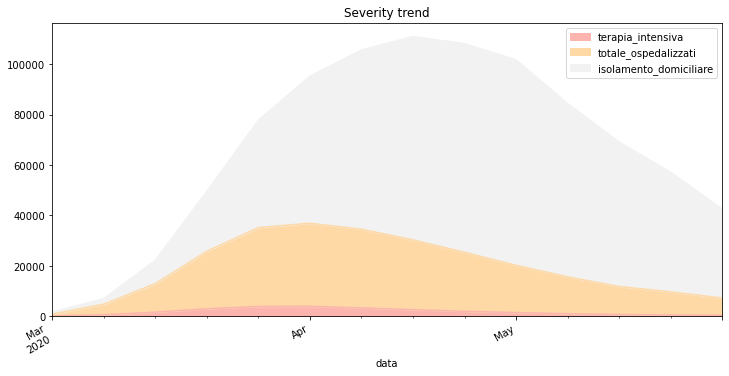

In [85]:
# data manipulation

# chose the data to display 
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
# focus on the first 3 months data<"2020-06-01T18:00:00" 
# data field can be changed for made different views
data_to_plot = data_to_plot.loc[data_to_plot["data"]<"2020-06-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
data_to_plot.plot.area(figsize=(12,6),title="Severity trend",colormap="Pastel1")
plt.gcf().autofmt_xdate()

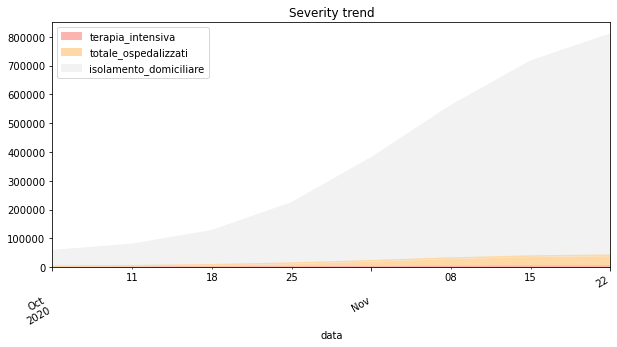

In [86]:
# data manipulation
# this flag is for display the home isolation of last period
# i set false because there are so much cases in home and this fact gave us a unreadable graph 
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
# focus on the last 2 months data>2020-10-01T18:00:00
# data field can be changed for made different views

data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-10-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
data_to_plot.plot.area(figsize=(10,5),title="Severity trend",colormap="Pastel1")
plt.gcf().autofmt_xdate()

questo è il grafico come quello sopra siccome diff tra isolamento dom e osp intensiva allora plotto solo ultime due

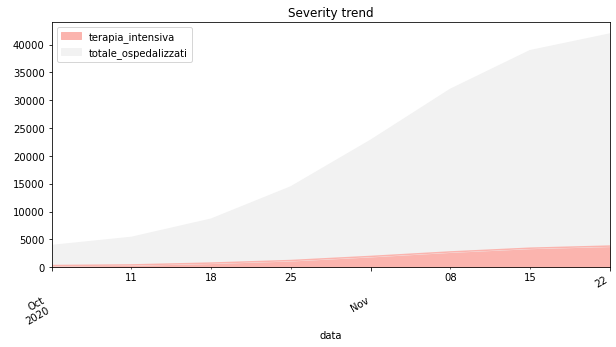

In [87]:
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati"]]
# focus on the last 2 months data>2020-10-01T18:00:00
# data field can be changed for made different views

data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-10-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
data_to_plot.plot.area(figsize=(10,5),title="Severity trend",colormap="Pastel1")
plt.gcf().autofmt_xdate()

discorso su positivi del giorno diviso tamponi per giorno e sul calcolare colonne aggregata

In [88]:
# data manipulation

NUMERO_REGIONI = df_regions.denominazione_regione.unique().shape[0]
# print("Number of region: ", NUMERO_REGIONI)
tamponi_per_giorno = []
old_value_tamp = dict()

for row in df_regions.itertuples():
    # 
    if row.denominazione_regione in old_value_tamp.keys():
        tamponi_per_giorno.append(row.tamponi - old_value_tamp[row.denominazione_regione])
    else:
        tamponi_per_giorno.append(row.tamponi)
        
    old_value_tamp[row.denominazione_regione] = row.tamponi
    #print("Data: ", row.data, " --- Old caso tamponi: ", row.tamponi)
    
df_regions["tamponi_per_giorno"] = tamponi_per_giorno

new_values = []
flags = []
index = 0
aux_list = []
for pos, tamp in zip(df_regions.nuovi_positivi, df_regions.tamponi_per_giorno):
    index += 1
    if (pos <= 0 or tamp <= 0):
        # is not a good value, i use flag = false for indicate that this row is not good and i discard later
        flags.append(False)
        NUMERO_REGIONI -= 1 # -one region per day cause i discard the row
    else:
        flags.append(True) #if is goog i append the pos*100/tamp
        aux_list.append((pos * 100) / (tamp))
        
    # if index%21 == 0 i have save the data of all regions for one date so i append in the real data
    if index % 21 == 0:
        for a in aux_list:
            new_values.append(a/NUMERO_REGIONI) # divided for the num reg modified because i discard some rows
        aux_list = []
        NUMERO_REGIONI = df_regions.denominazione_regione.unique().shape[0] #reset original number of region


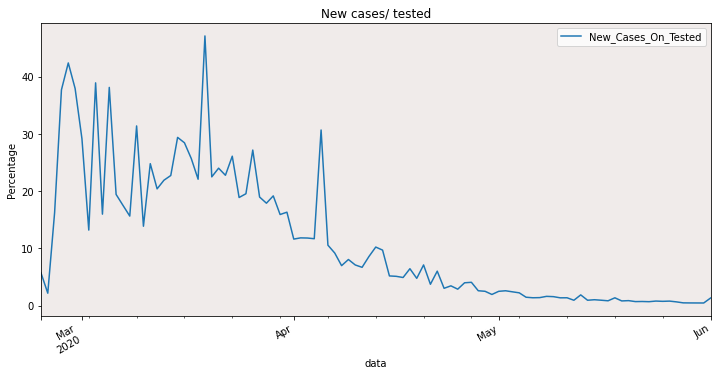

In [89]:
# data manipulation 
data_to_plot = df_regions[["data"]]
data_to_plot = data_to_plot.loc[flags] # remove rows with bad value
data_to_plot["New_Cases_On_Tested"] = new_values # insert new good values


data_to_plot = data_to_plot.loc[data_to_plot["data"]<"2020-06-01T18:00:00"]
data_to_plot = data_to_plot.groupby(["data"]).sum()#.asfreq("W")

# start plotting for this data i use the .plot() of pandas      
ax = data_to_plot.plot(kind='line',figsize=(12,6),title="New cases/ tested")
ax.set_facecolor("#F0EBEA")
ax.set_ylabel("Percentage")
plt.gcf().autofmt_xdate()

scrivere del indice degli ultimi 2 mesi della situa che stà tornano

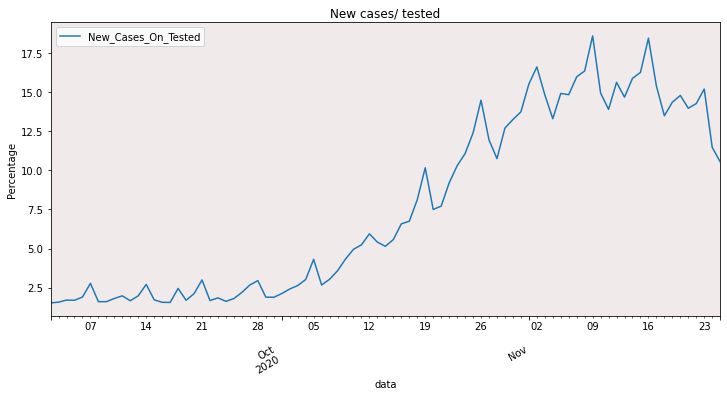

In [90]:
# data manipulation 
data_to_plot = df_regions[["data"]]
data_to_plot = data_to_plot.loc[flags] # remove rows with bad value
data_to_plot["New_Cases_On_Tested"] = new_values # insert new good values

data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-09-01T18:00:00"]
data_to_plot = data_to_plot.groupby(["data"]).sum()#.asfreq("W")

# start plotting for this data i use the .plot() of pandas      
ax = data_to_plot.plot(kind='line',figsize=(12,6),title="New cases/ tested")
ax.set_facecolor("#F0EBEA")
ax.set_ylabel("Percentage")
plt.gcf().autofmt_xdate()

here statistics of top X regions based of totale casi first or second wave
###  <font color='blue'>Interactive Cell</font> 

In [91]:
NUM_REGIONS = 5
# KEY showed in the following two graph
# "totale_casi", "tamponi", "totale_positivi","totale_ospedalizzati","deceduti"
# "terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"
KEY = "terapia_intensiva" 

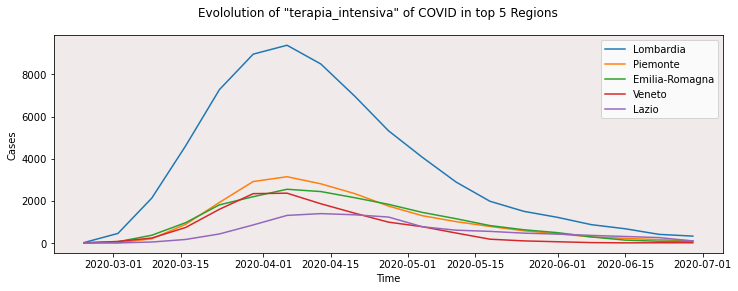

In [92]:
data_to_plot = df_regions[["denominazione_regione","totale_casi","tamponi",
                           "totale_positivi","totale_ospedalizzati","deceduti",
                           "terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
aux_df = data_to_plot.groupby(["denominazione_regione"]).max().nlargest(NUM_REGIONS, KEY)
nomi_regioni = list(aux_df.index) #print(nomi_province) #create a list with the max affected provinces

# select only the rows with most affected regions
df_plot = df_regions.loc[df_regions.denominazione_regione.isin(nomi_regioni)]
#select time frist wave
df_plot = df_plot.loc[df_plot["data"]<"2020-07-01T18:00:00"]
df_plot = df_plot.groupby(['denominazione_regione', pd.Grouper(key='data', freq='W-MON')])[KEY].sum().reset_index()
# in this case i cant use .asfreq() so i have used pd.Grouper()

# start plotting using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for reg in nomi_regioni:
    aux = df_plot.loc[df_plot.denominazione_regione == reg]
    #dont print last week because grouper set a wrong value
    plt.plot(aux["data"][:-1], aux[KEY][:-1], label=reg) 

fig.suptitle("Evololution of \"" + KEY + "\" of COVID in top " + str(NUM_REGIONS)+ " Regions")
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_facecolor("#F0EBEA")
plt.legend()
plt.show()

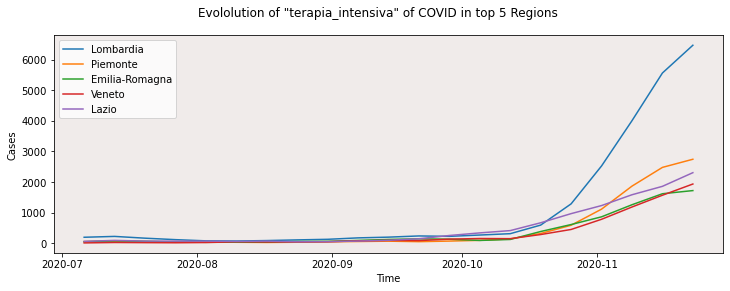

In [93]:
data_to_plot = df_regions[["denominazione_regione","totale_casi","tamponi",
                           "totale_positivi","totale_ospedalizzati","deceduti",
                           "terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
aux_df = data_to_plot.groupby(["denominazione_regione"]).max().nlargest(NUM_REGIONS, KEY)
nomi_regioni = list(aux_df.index) #print(nomi_province) #create a list with the max affected provinces

# select only the rows with most affected regions
df_plot = df_regions.loc[df_regions.denominazione_regione.isin(nomi_regioni)]
#select time frist wave
df_plot = df_plot.loc[df_plot["data"]>"2020-07-01T18:00:00"]
df_plot = df_plot.groupby(['denominazione_regione', pd.Grouper(key='data', freq='W-MON')])[KEY].sum().reset_index()
# in this case i cant use .asfreq() so i have used pd.Grouper()

# start plotting using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for reg in nomi_regioni:
    aux = df_plot.loc[df_plot.denominazione_regione == reg]
    #dont print last week because grouper set a wrong value
    plt.plot(aux["data"][:-1], aux[KEY][:-1], label=reg) 

fig.suptitle("Evololution of \"" + KEY + "\" of COVID in top " + str(NUM_REGIONS)+ " Regions")
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_facecolor("#F0EBEA")
plt.legend()
plt.show()

## Provinces analysis <a name="3"></a>

Let's use the province json file fom made a ranking of the most affective provinces.
###  <font color='blue'>Interactive Cell</font> 

In [94]:
NUM_OF_PROVINCES = 5 # u can change it

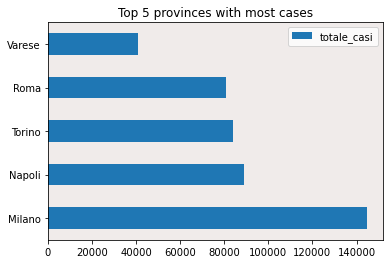

In [95]:
data_to_plot = df_provinces[["denominazione_provincia","totale_casi"]]
# group data by nlargest of max
ax = data_to_plot.groupby(["denominazione_provincia"]).max().nlargest(NUM_OF_PROVINCES, "totale_casi").plot(title=("Top "+ str(NUM_OF_PROVINCES) + " provinces with most cases"),kind="barh")
ax.set_ylabel("")
ax.set_facecolor("#F0EBEA")

Now i want to see the evolution in time of the most affected provinces

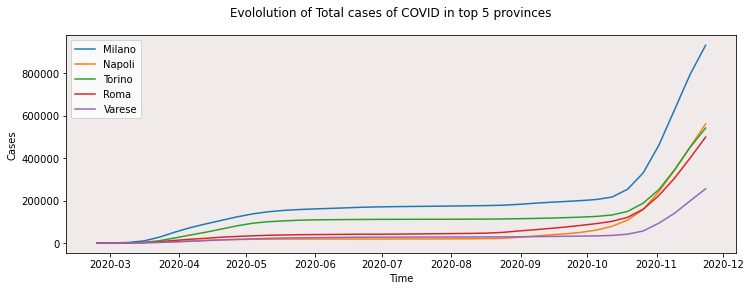

In [96]:
data_to_plot = df_provinces[["denominazione_provincia","totale_casi"]]
aux_df = data_to_plot.groupby(["denominazione_provincia"]).max().nlargest(NUM_OF_PROVINCES, "totale_casi")
nomi_province = list(aux_df.index) #print(nomi_province) #create a list with the max affected provinces

# select only the rows with most affected provinces
df_plot = df_provinces.loc[df_provinces.denominazione_provincia.isin(nomi_province)]
df_plot = df_plot.groupby(['denominazione_provincia', pd.Grouper(key='data', freq='W-MON')])['totale_casi'].sum().reset_index()
# in this case i cant use .asfreq() so i have used pd.Grouper()

# start plotting using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for reg in nomi_province:
    aux = df_plot.loc[df_plot.denominazione_provincia == reg]
    #dont print last week because grouper set a wrong value
    plt.plot(aux["data"][:-1], aux["totale_casi"][:-1], label=reg) 

fig.suptitle("Evololution of Total cases of COVID in top " + str(NUM_OF_PROVINCES)+ " provinces")
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_facecolor("#F0EBEA")
plt.legend()
plt.show()

## Data preparation for heatmap <a name="4"></a>

Now is interesting to see how to merge the information of regions and provinces with the geometrical information later for made heatmap.

In [97]:
# select the information from region
data_from_regions = df_regions[["data", "denominazione_regione", "totale_casi", 
                                "tamponi", "deceduti"]]
# select the last "data" because the fields "totale_casi", "tamponi", "deceduti" are cumulative
data_from_regions = data_from_regions.loc[df_regions.data == data_from_regions.iloc[[-1]]["data"].item()]
display(data_from_regions)

,data,denominazione_regione,totale_casi,tamponi,deceduti
5775,2020-11-25,Abruzzo,25445,389766,831
5776,2020-11-25,Basilicata,7218,144321,133
5777,2020-11-25,Calabria,14859,350996,250
5778,2020-11-25,Campania,143010,1484741,1434
5779,2020-11-25,Emilia-Romagna,112700,2040254,5493
5780,2020-11-25,Friuli Venezia Giulia,26285,679986,715
5781,2020-11-25,Lazio,109592,2092689,2146
5782,2020-11-25,Liguria,49381,578449,2308
5783,2020-11-25,Lombardia,386958,3904809,21005
5784,2020-11-25,Marche,27554,398356,1211


Scrivere adesso che ho preso dall'istat i dati di mappe per usare geopandas e affiancare i dati della mappa dell'italia dopo averla plottata alla tabella delle regioni con il totale dei tamponi dei morti e dei casi.

Dire del discorso delle due province autonome bolzano e trento di come prendo i dati e me li salvo sommati in una nuova regione con denominazione Trentino-Alto Adige

In [98]:
last_date = data_from_regions["data"].max()

tamponi = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano"]["tamponi"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento"]["tamponi"].values[0]

totale_casi = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano", "totale_casi"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento", "totale_casi"].values[0]

deceduti = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano", "deceduti"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento", "deceduti"].values[0]

data_from_regions = data_from_regions.append({"data": last_date,  "denominazione_regione": "Trentino-Alto Adige", 
                          "tamponi": tamponi, "totale_casi": totale_casi, "deceduti": deceduti}, 
                         ignore_index=True)

data_from_regions= data_from_regions.loc[~data_from_regions.denominazione_regione.isin(["P.A. Bolzano", "P.A. Trento"])]
display(data_from_regions)
print("Number of Regions: ", len(data_from_regions))

,data,denominazione_regione,totale_casi,tamponi,deceduti
0,2020-11-25,Abruzzo,25445,389766,831
1,2020-11-25,Basilicata,7218,144321,133
2,2020-11-25,Calabria,14859,350996,250
3,2020-11-25,Campania,143010,1484741,1434
4,2020-11-25,Emilia-Romagna,112700,2040254,5493
5,2020-11-25,Friuli Venezia Giulia,26285,679986,715
6,2020-11-25,Lazio,109592,2092689,2146
7,2020-11-25,Liguria,49381,578449,2308
8,2020-11-25,Lombardia,386958,3904809,21005
9,2020-11-25,Marche,27554,398356,1211


Number of Regions:  20


In [99]:
# select the information from the two dataframe
data_from_regions2 = df_regions[["data", "denominazione_regione", "totale_casi","codice_regione"]]
data_from_provinces = df_provinces[["data", "denominazione_regione", "denominazione_provincia",
                                    "totale_casi","codice_provincia","lat","long"]]

merged = pd.merge(data_from_regions2, data_from_provinces, on=["denominazione_regione", "data"])
#eliminare righe con in denominazione_provincia = In fase di definizione/aggiornamento
# select the last "data" because the fields "totale_casi", "tamponi", "deceduti" are cumulative
data_from_provinces = merged.loc[df_provinces.data == merged.iloc[[-1]]["data"].item()]
data_from_provinces.head(1)

,data,denominazione_regione,totale_casi_x,codice_regione,denominazione_provincia,totale_casi_y,codice_provincia,lat,long
38413,2020-11-25,Abruzzo,25445,13,L'Aquila,8234,66,42.351222,13.398438


In [100]:
# rename the column of merged information
data_from_provinces.columns = ["data", "denominazione_regione","totale_casi_regione", "codice_regione",
                  "denominazione_provincia", "totale_casi_provincia", "codice_provincia",
                  "lat_prov", "long_prov"]
display(data_from_provinces)

,data,denominazione_regione,totale_casi_regione,codice_regione,denominazione_provincia,totale_casi_provincia,codice_provincia,lat_prov,long_prov
38413,2020-11-25,Abruzzo,25445,13,L'Aquila,8234,66,42.351222,13.398438
38414,2020-11-25,Abruzzo,25445,13,Teramo,6779,67,42.658918,13.704400
38415,2020-11-25,Abruzzo,25445,13,Pescara,5108,68,42.464584,14.213648
38416,2020-11-25,Abruzzo,25445,13,Chieti,4901,69,42.351032,14.167546
38417,2020-11-25,Abruzzo,25445,13,Fuori Regione / Provincia Autonoma,224,879,NaN,NaN
...,...,...,...,...,...,...,...,...,...
38557,2020-11-25,Veneto,130076,5,Venezia,18892,27,45.434905,12.338452
38558,2020-11-25,Veneto,130076,5,Padova,24780,28,45.406930,11.876087
38559,2020-11-25,Veneto,130076,5,Rovigo,3547,29,45.071073,11.790070
38560,2020-11-25,Veneto,130076,5,Fuori Regione / Provincia Autonoma,2251,899,NaN,NaN


 I need to manipulate the data and i decided to redistribute for each provinces in every regions the data  Fuori Regione / Provincia Autonoma and In fase di definizione/aggiornamento	

In [ ]:
# INSERT CODE HERE FOR REMOVE AND REDISTRIBUITE the FUORI/REGIONE IN FASE DI DEF su data from provinces

### Heatmap guide by istat

https://github.com/napo/geopandas_esempi/blob/master/dati%20istat.ipynb      guidaaaaaaaa

prima parlo della guida  dell'istat e di come viene una tabella con i dati fusi sia di province che di regioni

In [101]:
#ho trovato questa guida dell'istat che ti permette di scaricare le mappe con geopandas
download = False
if download:
    zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
    r = requests.get(zipconfini)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()

questo genera la cartella "Limiti01012018" che a sua volta contiene:
    - Com01012018 : confini comunali
    - ProvCM01012018 : confini provinciali
    - Reg01012018 : confini regionali
    - RipGeo01012018 : ripartizioni geografiche
    
xxxxxxxxxxxxxxxxxx_WGS84.shp

In [102]:
# load the dataframe of italian regions with geopandas and the downloaded information
geometry_regions = gpd.read_file("Limiti01012018" + os.sep + "Reg01012018" + os.sep + "Reg01012018_WGS84.shp")
geometry_regions.head(1)

,COD_RIP,COD_REG,DEN_REG,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry
0,3,12,Lazio,1.201765e+06,1.723172e+10,1.201765e+06,"MULTIPOLYGON (((769745.511 4625758.609, 769787..."


In [103]:
# load the dataframe of italian regions with geopandas and the downloaded information
geometry_provinces = gpd.read_file("Limiti01012018" + os.sep + "ProvCM01012018" + os.sep + "ProvCM01012018_WGS84.shp")
geometry_provinces.head(1)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,2.081602e+09,458754.447958,"POLYGON ((437900.551 5088796.203, 437915.020 5..."


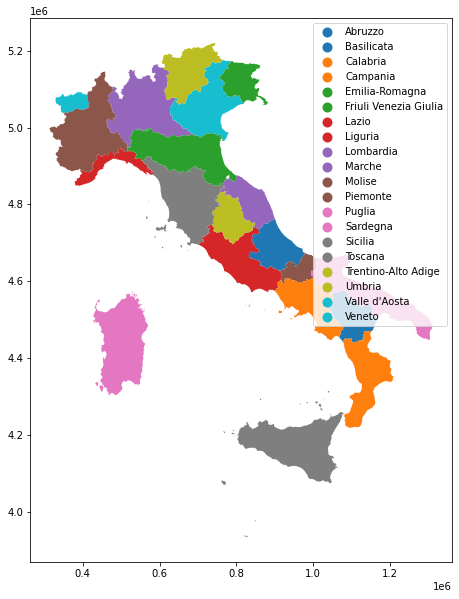

In [104]:
# example of heatmap by region
geometry_regions.plot(column='DEN_REG',legend=True, figsize=(10,10))

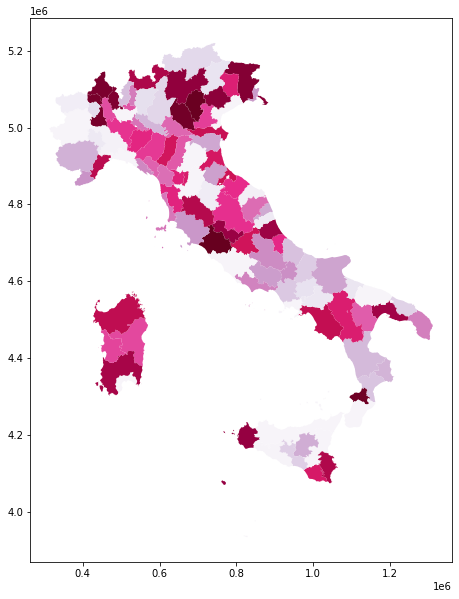

In [105]:
# example of heatmap by provinces
geometry_provinces.plot(column='DEN_PROV',cmap="PuRd", figsize=(10,10))

In [113]:
# preparing data for regions heatmap
heatmap_regions_data = pd.merge(geometry_regions, data_from_regions,  left_on=  ['DEN_REG'],
                   right_on= ['denominazione_regione'])
heatmap_regions_data.head(1)

,COD_RIP,COD_REG,DEN_REG,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry,data,denominazione_regione,totale_casi,tamponi,deceduti
0,3,12,Lazio,1.201765e+06,1.723172e+10,1.201765e+06,"MULTIPOLYGON (((769745.511 4625758.609, 769787...",2020-11-25,Lazio,109592,2092689,2146


In [107]:
# preparing data for provinces heatmap
heatmap_provinces_data = pd.merge(geometry_provinces, data_from_provinces,  left_on=  ['COD_PROV'],
                   right_on= ['codice_provincia'])
heatmap_provinces_data.head(1)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,...,geometry,data,denominazione_regione,totale_casi_regione,codice_regione,denominazione_provincia,totale_casi_provincia,codice_provincia,lat_prov,long_prov
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,...,"POLYGON ((437900.551 5088796.203, 437915.020 5...",2020-11-25,Piemonte,156253,1,Vercelli,5766,2,45.323981,8.423234


## Heatmap with data <a name="5"></a>


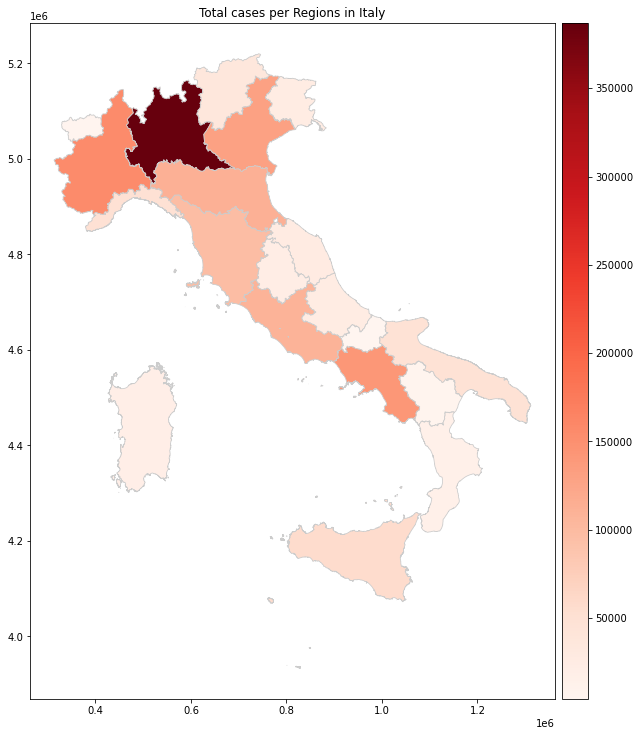

In [108]:
# Heatmap of total cases
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total cases per Regions in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_regions_data[["totale_casi"]].min()[0], heatmap_regions_data[["totale_casi"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_regions_data.plot(column="totale_casi", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8")

COMMENTO SUI TAMPONI TOTALI ChE SON FATTI ADESSO E dIre che la colorbar è *1e6 perchè adesso si sono fatti tantissimi tamponi

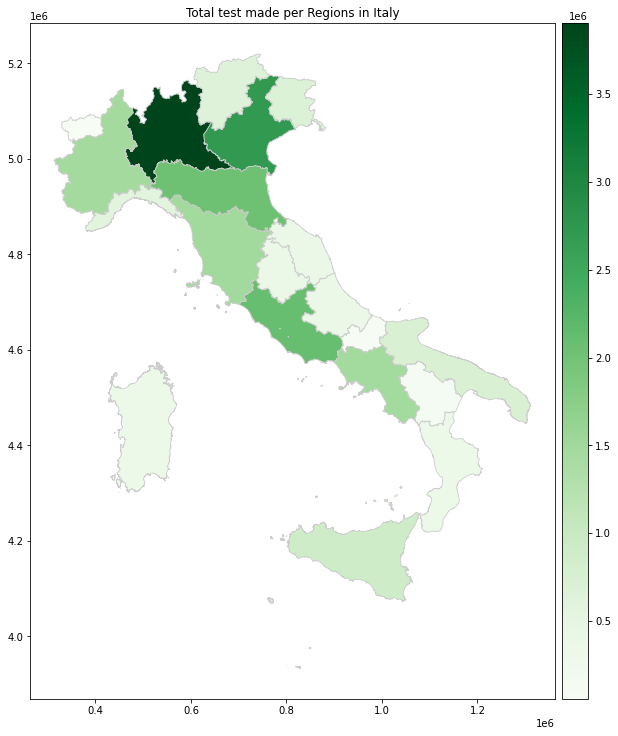

In [109]:
# Heatmap of executed test 
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total test made per Regions in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_regions_data[["tamponi"]].min()[0], heatmap_regions_data[["tamponi"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_regions_data.plot(column="tamponi", cmap="Greens", linewidth=0.8, ax=ax, edgecolor="0.8")

commento sulla heatmap del'heatmap dei morti

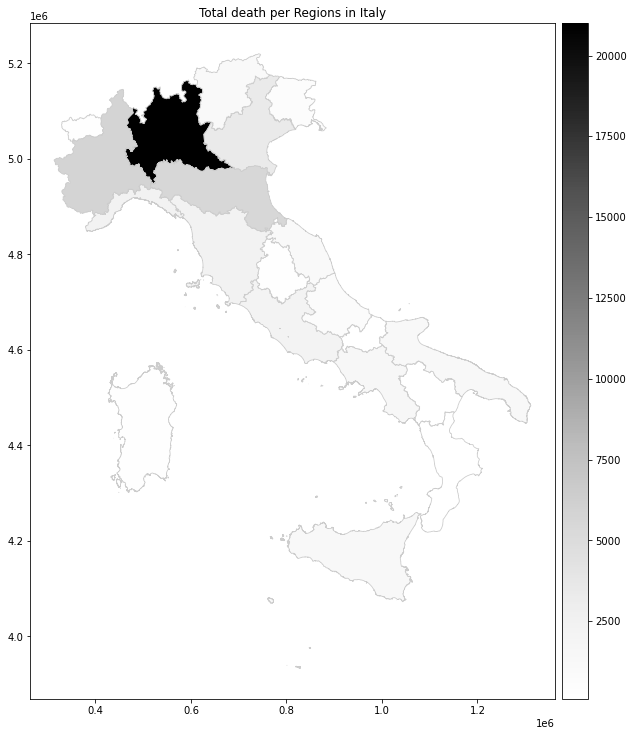

In [110]:
# Heatmap of death
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total death per Regions in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_regions_data[["deceduti"]].min()[0], heatmap_regions_data[["deceduti"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Greys", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_regions_data.plot(column="deceduti", cmap="Greys", linewidth=0.8, ax=ax, edgecolor="0.8")

### Heatmap of Provinces

commento solo totale casi

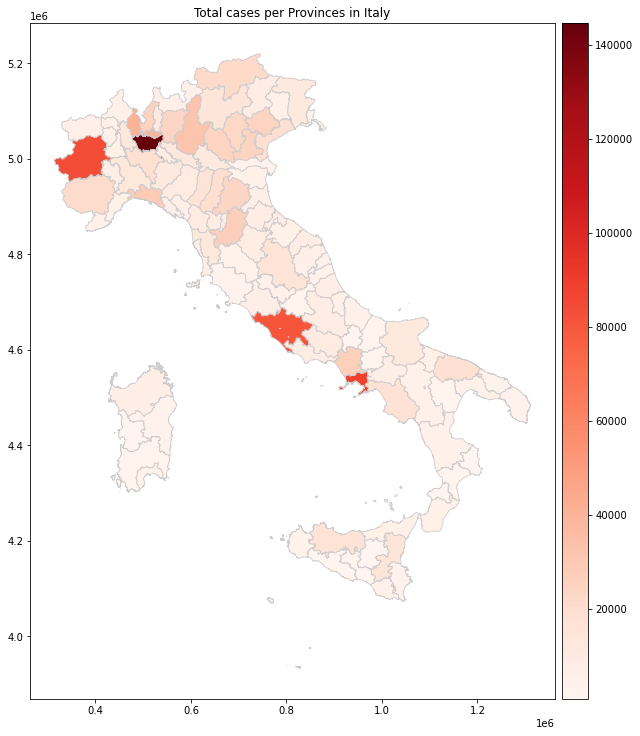

In [112]:
# Heatmap of total cases per provinces
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total cases per Provinces in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_provinces_data[["totale_casi_provincia"]].min()[0], heatmap_provinces_data[["totale_casi_provincia"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_provinces_data.plot(column="totale_casi_provincia", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8")

## Extra: Let's do some Machine Learning on data

In [ ]:
# pensare a come fare in fondo una roba tipo knn per creare le tre zone gialla arancio e rossa

#raggruppo la tabella per settimane e funziona
# df_regions['data'] = pd.to_datetime(df_regions['data']) - pd.to_timedelta(7, unit='d')
# df_regions = df_regions.groupby(['denominazione_regione', pd.Grouper(key='data', freq='W-MON')])['ricoverati_con_sintomi','terapia_intensiva'].sum().reset_index().sort_values('data')
# print (df_regions)
#metto sklearn fo knn e poi penso a come fare i grafici?